<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 2: Machine Learning for Malware Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 35 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been given a large sample of derived malware features that describe 14 different malware variants (2000 samples of each). The purpose of this task is to understand the underlying concepts of classification, and **your task will be to develop two classifiers that can classify malware varients**. The first part will focus on a small hand-made classifier using only 3 malware classes, to understand the principles of search space and minimisation of a function. The second part will focus on using off-the-shelf libraries to scale up the classification to all 14 classes of malware present in the dataset.

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

**Part 1: Developing a Classifier "by hand" - (Total Marks: 20)**

* **Task 1:** Find the Centroid point of each of the three groups (3)
* **Task 2:** Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)
* **Task 3:** For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)
* **Task 4:** Provide a final accuracy score for the performance of your "by hand" classifier (2)

**Part 2: Developing a large-scale ML classifier - (Total Marks: 15)**

* **Task 5:** Scale the Input Features for further processing using the StandardScaler function (1)
* **Task 6:** Obtain numerical labels for each class using the LabelEncoder function (1)
* **(Advanced) Task 7:** Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)
* **(Advanced) Task 8:** Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 9:** Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 10:** Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
features = pd.read_csv('./T2_data/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [3]:
labels = pd.read_csv('./T2_data/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels

,label
0,high
1,high
2,high
3,high
4,high
...,...
27995,zbot
27996,zbot
27997,zbot
27998,zbot


In the cells above, we have created two DataFrames: ***features*** and ***labels***.

***Features***: This table contains 28000 instances of malware, where each instance of malware is characterised by 256 distinct features relating to how it performs and its impact on the associated systems.

***Labels***: This table contains 28000 rows, where each row is the label of the malware class, related to the features table. There are 2000 samples of each malware varient, and 14 varients in total.

## Part 1: Developing a Classifier "by hand"

In [4]:

# DO NOT MODIFY THIS CELL - this cell is splitting the data to provide a suitable subset of data to work with for this task.
# If you change this cell your output will differ from that expected and could impact your mark.


mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


Text(0, 0.5, 'Feature Y')

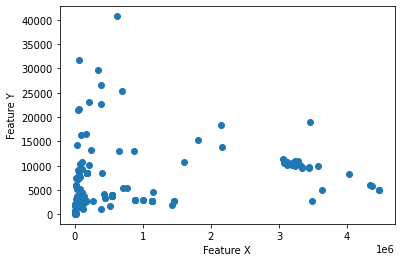

In [5]:
plt.scatter(train_data['x'], train_data['y'])
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

### Task 1: Find the Centroid point of each of the three groups (3)

In [6]:

train_data_w = train_data[train_data["labels"] == 'wannacry']
train_data_s = train_data[train_data["labels"] == 'startsurf']
train_data_r = train_data[train_data["labels"] == 'razy']


train_data_w.x.mean = train_data_w['x'].mean()
train_data_w.y.mean = train_data_w['y'].mean()
train_data_s.x.mean = train_data_s['x'].mean()
train_data_s.y.mean = train_data_s['y'].mean()
train_data_r.x.mean = train_data_r['x'].mean()
train_data_r.y.mean = train_data_r['y'].mean()

print("wannacry:x",train_data_w.x.mean, "wannacry:y",train_data_w.y.mean)
print("startsurf:x",train_data_s.x.mean, "startsurf:y",train_data_s.y.mean)
print("razy:x",train_data_r.x.mean, "razy:y",train_data_r.y.mean)

wannacry:x 2181660.66 wannacry:y 11087.1
startsurf:x 478778.12 startsurf:y 3754.04
razy:x 100505.22 razy:y 6158.28


### Task 2: Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)

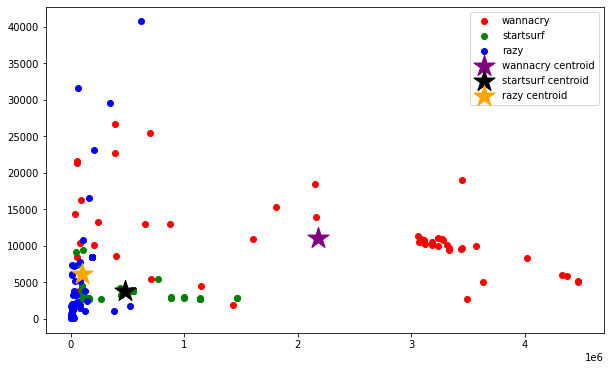

In [29]:
# ANSWER
train_data_w = train_data[train_data["labels"] == 'wannacry']
train_data_s = train_data[train_data["labels"] == 'startsurf']
train_data_r = train_data[train_data["labels"] == 'razy']


train_data_w.x.mean = train_data_w['x'].mean()
train_data_w.y.mean = train_data_w['y'].mean()
train_data_s.x.mean = train_data_s['x'].mean()
train_data_s.y.mean = train_data_s['y'].mean()
train_data_r.x.mean = train_data_r['x'].mean()
train_data_r.y.mean = train_data_r['y'].mean()

plt.figure(figsize=(10,6))

plt.scatter(train_data_w['x'],train_data_w['y'], color = 'red', label='wannacry')
plt.scatter(train_data_s['x'],train_data_s['y'], color = 'green', label='startsurf')
plt.scatter(train_data_r['x'],train_data_r['y'], color = 'blue', label='razy')

plt.scatter(train_data_w.x.mean, train_data_w.y.mean, color = 'purple',s=500, marker = '*', label='wannacry centroid') #Plot the wannacry's centroid
plt.scatter(train_data_s.x.mean, train_data_s.y.mean, color = 'black', s=500, marker = '*', label='startsurf centroid')
plt.scatter(train_data_r.x.mean, train_data_r.y.mean, color = 'orange', s=500, marker = '*', label='razy centroid')


plt.legend()

### Task 3: For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task*

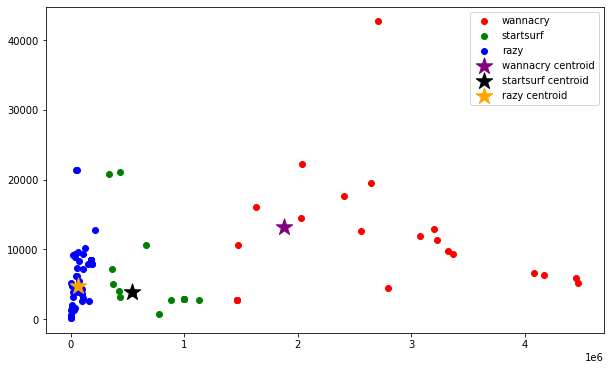

In [26]:
# ANSWER

test_data_w = test_data[test_data["labels"] == 'wannacry']
test_data_s = test_data[test_data["labels"] == 'startsurf']
test_data_r = test_data[test_data["labels"] == 'razy' ]

test_data_w.x.mean = test_data_w['x'].mean()
test_data_w.y.mean = test_data_w['y'].mean()
test_data_s.x.mean = test_data_s['x'].mean()
test_data_s.y.mean = test_data_s['y'].mean()
test_data_r.x.mean = test_data_r['x'].mean()
test_data_r.y.mean = test_data_r['y'].mean()


group1 = []
group2 = []
group3 = []
    
def find_groups():
    group1 = []
    group2 = []
    group3 = []
    
    
    for i in range(len(test_data)):
        distance1 = np.sqrt(np.abs(test_data.iloc[i, 0] - test_data_w.x.mean) ** 2 + np.abs(test_data.iloc[i, 1] - test_data_w.y.mean) ** 2)
        distance2 = np.sqrt(np.abs(test_data.iloc[i, 0] - test_data_s.x.mean) ** 2 + np.abs(test_data.iloc[i, 1] - test_data_s.y.mean) ** 2)
        distance3 = np.sqrt(np.abs(test_data.iloc[i, 0] - test_data_r.x.mean) ** 2 + np.abs(test_data.iloc[i, 1] - test_data_r.y.mean) ** 2)
        distances = [distance1, distance2, distance3]
        
        
        #print (distances)
        if np.argmin(distances) == 0:
            group1.append([test_data.iloc[i, 0], test_data.iloc[i, 1]])
        elif np.argmin(distances) == 1:
            group2.append([test_data.iloc[i, 0], test_data.iloc[i, 1]])
        elif np.argmin(distances) == 2:
            group3.append([test_data.iloc[i, 0], test_data.iloc[i, 1]])
            
    group1 = np.array(group1)
    group2 = np.array(group2)
    group3 = np.array(group3)
    return group1, group2, group3
            
group1, group2, group3 = find_groups()



#print ("group 1:", group1)
#print ("group 2:", group2)
#print ("group 3:", group3)
plt.figure(figsize=(10,6))
plt.scatter(group1[:,0], group1[:,1], c='r', label='wannacry')
plt.scatter(group2[:,0], group2[:,1], c='g', label='startsurf')
plt.scatter(group3[:,0], group3[:,1], c='b', label='razy')

plt.scatter(test_data_w.x.mean, test_data_w.y.mean, s=300, marker = '*', color='purple', label='wannacry centroid')
plt.scatter(test_data_s.x.mean, test_data_s.y.mean, s=300, marker = '*', color='black', label='startsurf centroid')
plt.scatter(test_data_r.x.mean, test_data_r.y.mean, s=300, marker = '*', color='orange', label='razy centroid')

plt.legend()

### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier (2)

In [9]:
# ANSWER
score = 0
label = ['wannacry','startsurf','razy']

for i in range(len(test_data)):
    distance1 = np.sqrt(np.abs(test_data.iloc[i, 0] - test_data_w.x.mean) ** 2 + np.abs(test_data.iloc[i, 1] - test_data_w.y.mean) ** 2)
    distance2 = np.sqrt(np.abs(test_data.iloc[i, 0] - test_data_s.x.mean) ** 2 + np.abs(test_data.iloc[i, 1] - test_data_s.y.mean) ** 2)
    distance3 = np.sqrt(np.abs(test_data.iloc[i, 0] - test_data_r.x.mean) ** 2 + np.abs(test_data.iloc[i, 1] - test_data_r.y.mean) ** 2)
    distances = [distance1, distance2, distance3]
    smallest_index = np.argmin(distances)
    #print(smallest_index)
    #print(distances)
    #print(test_data.at[i,'labels'])
    
    if label[smallest_index]==test_data.at[i,'labels']:
        score = score+1


print("The accuracy score is:", score)

The accuracy score is: 63


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification.

### Task 5: Scale the Input Features for further processing using the StandardScaler function (1)

In [10]:
# ANSWER
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_input = scaler.fit_transform(features)
print(scaled_input)

[[-0.0978198   0.67215876  0.82663021 ...  0.1357412   0.17814439
   0.40617301]
 [-0.35508456 -0.29156716 -0.27456922 ... -0.16889972 -0.21809863
  -0.2386657 ]
 [-0.35178418  0.37984379  0.24155808 ...  0.21077877  0.19202385
  -0.23072864]
 ...
 [-0.35058059 -0.37961299 -0.38237754 ... -0.31013839 -0.34541401
  -0.26045037]
 [-0.34595246  0.01402847 -0.18442612 ... -0.37112451 -0.38225198
  -0.24646054]
 [-0.37642742 -0.42802765 -0.47665936 ... -0.37851238 -0.39247895
  -0.27324031]]


### Task 6: Obtain numerical labels for each class using the LabelEncoder function (1)

In [11]:
# ANSWER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_labels = labels
L_labels = le.fit_transform(le_labels)
print(L_labels)

[ 7  7  7 ... 13 13 13]


/home/uwe/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### (Advanced) Task 7: Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)

In [12]:
# ANSWER
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_input, L_labels)
print(X_train.shape)

(21000, 256)


### (Advanced) Task 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [13]:
# ANSWER
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mlp = MLPClassifier()
clf_model = mlp.fit(X_train, y_train)
y_predict = clf_model.predict(X_test)
acc_score = accuracy_score(y_test, y_predict)
print("The accuracy score is:","{:.2%}".format(acc_score))

The accuracy score is: 80.33%


/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### (Advanced) Task 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [14]:
# ANSWER
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = rf.score(X_test, y_test)

print("The accuracy score is:","{:.2%}".format(accuracy))

The accuracy score is: 87.91%


### (Advanced) Task 10: Show how ML parameters can improve the models to achieve a high accuracy score of over 80%

*Marks wil be awarded for how your tuning improves accuracy beyond 80%.*

In [33]:
#Set the parameter of n_estimators to [1,2,3], and max_depth = [2,3,4]
#Accuracy at the beginning is below 50% 

from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Number of trees in random forest
n_estimators = [1,2,3]

# Maximum number of levels in tree
max_depth = [2,3,4]



param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth              
             }

rf = RandomForestClassifier(n_estimators = n_estimators,max_depth = max_depth)

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       )

rf_grid.fit(X_train,y_train)

#predict = rf_grid.predict(X_test)

acc_score = rf_grid.score(X_test, y_test)

acc_score = "{:.2%}".format(acc_score)

print("The accuracy score for RandomForestClassifier is:",acc_score)


The accuracy score for RandomForestClassifier is: 52.03%


In [34]:
# ANSWER

#Try to increase the value inside the parameters, and the accuracy score is now over 80%

# Import the GridSearchCV class


# Number of trees in random forest
n_estimators = [2,4,8]

# Maximum number of levels in tree
max_depth = [5,10,12]



param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth              
             }

rf = RandomForestClassifier(n_estimators = n_estimators,max_depth = max_depth)

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       )

rf_grid.fit(X_train,y_train)

#predict = rf_grid.predict(X_test)

acc_score = rf_grid.score(X_test, y_test)

acc_score = "{:.2%}".format(acc_score)

print("The accuracy score for RandomForestClassifier is:",acc_score)


The accuracy score for RandomForestClassifier is: 82.54%


In [30]:
#Set the values of the Parameter in MLP classifier smaller at the beginning
mlp = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(2,), (4,), (6,)],
    'alpha': [0.01, 0.1, 1],
    'max_iter': [10, 20, 30]
    
}

mlp_grid = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

mlp_grid.fit(X_train,y_train)


best_score = mlp_grid.best_score_

print("Best parameter:", mlp_grid.best_params_)
print("The Best score:", "{:.2%}".format(mlp_grid.best_score_))

Best parameter: {'alpha': 0.01, 'hidden_layer_sizes': (6,), 'max_iter': 30}
The Best score: 57.94%


/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
#Increase the value of the parameter to increase the accuracy score up to 80%

parameter_space = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.01, 0.1, 1],
    'max_iter': [300, 500, 750]
    
}
mlp = MLPClassifier(max_iter=1000)

mlp_grid = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='accuracy',return_train_score=True)

mlp_grid.fit(X_train,y_train)

best_score = mlp_grid.best_score_

print("Best parameter:", mlp_grid.best_params_)
print("The Best score:", "{:.2%}".format(mlp_grid.best_score_))





Best parameter: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 500}
The Best score: 80.15%


/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/

/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/uwe/.local/lib/python3.8/site-packages/sklearn/neural_network/